# NOMS Paper 80-Feature Vector

Only a selection of features below is used for XGBoost.

PLAYGROUND VERSION FROM 23-09-30 should be used

In [1]:
import pyarrow as pa
import pyarrow.parquet as pq

phishing = pq.read_table('floor/phishing_2307.parquet')
benign = pq.read_table('floor/benign_2307.parquet')

from transformers.drop_nontrain import drop_nontrain_table as drop_nontrain
phishing = drop_nontrain(phishing)
benign = drop_nontrain(benign)

# realign schemas (parquet files save in nonsense orders)
benign = benign.cast(phishing.schema)

# concatentate tables
data = pa.concat_tables([phishing, benign])
df = data.to_pandas()

from transformers.cast_timestamp import cast_timestamp
df = cast_timestamp(df)


# Backwards compatibility with old NOMS features names ====
renames = {
    "rdap_ip_v4_count": "ip_v4_count",
    "rdap_ip_v6_count": "ip_v6_count",
    #"dns_mx_avg_len": "dns_mx_mean_len",
    #"dns_mx_avg_entropy": "dns_mx_mean_entropy",
    #"dns_txt_avg_entropy": "dns_txt_mean_entropy",
    

}

# ==========================================================

df.rename(columns=renames, inplace=True)

used_features = [
    
    # LEX ===============================
    # old (Adam) & still used
    "lex_name_len",
    "lex_begins_with_digit",
    "lex_www_flag",
    #"lex_digit_count", <-- abandoned, almost the same as "lex_sub_digit_ratio"
    #"lex_has_digit", # <== CAMERA READY REMOVE ****************************
    "lex_phishing_keyword_count",
    "lex_consecutive_chars",
    "lex_tld_len",
    "lex_tld_hash", # <============== CAMERA READY ADD ++++++++++++
    "lex_sld_len",
    "lex_sld_norm_entropy", # <-- newly added feature on 24-09-29
    
    "lex_stld_unique_char_count",
    
    "lex_sub_count",
    #"lex_sub_digit_count", # <== CAMERA READY REMOVE ****************************
    "lex_sub_digit_ratio",
    #"lex_sub_non_alphanum_count",  # <== CAMERA READY REMOVE ****************************
    "lex_sub_hex_ratio",
    "lex_sub_non_alphanum_ratio",  # <== CAMERA READY ADD ****************************
    #"lex_sub_vowel_count", # <== CAMERA READY REMOVE ****************************
    "lex_sub_vowel_ratio", # <== CAMERA READY ADD ****************************
    "lex_sub_consonant_ratio",
    "lex_sub_max_consonant_len",
    "lex_sub_norm_entropy",
    
    "lex_phishing_bigram_matches",
    "lex_phishing_trigram_matches",
    "lex_phishing_tetragram_matches",
    "lex_phishing_pentagram_matches",
    
    
    # DNS  ===============================
    # old (Adam) & still used
    "dns_A_count",
    "dns_AAAA_count",
    "dns_CNAME_count",
    "dns_MX_count",
    "dns_NS_count",
    #"dns_SOA_count", <== CAMERA READY REMOVE ****************************
    "dns_TXT_count",
    "dns_soa_primary_ns_len",
    "dns_soa_primary_ns_level", # renamed
    "dns_soa_primary_ns_digit_count",
    "dns_soa_primary_ns_entropy",
    "dns_soa_email_len",
    "dns_soa_email_level", # renamed
    "dns_soa_email_digit_count",
    "dns_soa_email_entropy",
     #"dns_soa_serial", <== CAMERA READY REMOVE ****************************
    "dns_soa_refresh",
    "dns_soa_retry",
    "dns_soa_expire",
    #"dns_soa_neg_resp_caching_ttl",
    "dns_mx_avg_len",
    "dns_mx_avg_entropy",
    "dns_domain_name_in_mx",
    #"dns_txt_google_verified",
    "dns_txt_spf_exists",
    "dns_txt_avg_entropy",
    
    "dns_ttl_low", #<== CAMERA READY ADD +++++++++++++++++++++++
    "dns_ttl_mid", #<== CAMERA READY ADD +++++++++++++++++++++++
    "dns_zone_entropy", #<== CAMERA READY ADD +++++++++++++++++++++++
    
    
    # IP  ===============================
    # old (Adam) & still used
    "ip_mean_average_rtt",
    "ip_entropy",
    
    # new
    "ip_count", "ip_v4_count", "ip_v6_count",
    
    
    
    
    # new
    #"dns_txt_dkim_exists", <== CAMERA READY REMOVE ****************************
    
    # TLS  ===============================
    # old (Adam) & still used
    
    "tls_broken_chain",
    "tls_expired_chain",
    "tls_total_extension_count",
    "tls_critical_extensions",
    "tls_with_policies_crt_count",
    "tls_percentage_crt_with_policies",
    "tls_x509_anypolicy_crt_count",
    "tls_iso_policy_crt_count",
    "tls_joint_isoitu_policy_crt_count",
    #"tls_iso_policy_oid", <== CAMERA READY REMOVE ****************************
    #"tls_isoitu_policy_oid", <== CAMERA READY REMOVE ****************************
    #"tls_unknown_policy_crt_count", <-- Abandoned, no useful values
    "tls_subject_count",
    "tls_server_auth_crt_count",
    "tls_client_auth_crt_count",
    "tls_CA_certs_in_chain_ratio",
    "tls_unique_SLD_count",
    "tls_common_name_count",
    "tls_root_cert_validity_len",
    "tls_leaf_cert_validity_len",
    
    # new
    "tls_chain_len",
    #"tls_root_cert_lifetime", <== CAMERA READY REMOVE ****************************
    #"tls_leaf_cert_lifetime", <== CAMERA READY REMOVE ****************************
    
    
    
    
    # nothing
    
    # RDAP ===============================
    # old (Adam) & still used
    "rdap_registration_period",
    "rdap_has_dnssec",
    
    # new
    "rdap_domain_age",
    "rdap_time_from_last_change",
    "rdap_domain_active_time",
    "rdap_registrar_name_hash", # <============== CAMERA READY ADD ++++++++++++
    "rdap_ip_avg_admin_name_len",
    
    # GEO ===============================
    # old (Adam) & still used
    "geo_countries_count",
    "geo_continent_hash",
    "geo_countries_hash"
]

print(len(used_features))

df = df[["label", *used_features]]

df


80


,label,lex_name_len,lex_begins_with_digit,lex_www_flag,lex_phishing_keyword_count,lex_consecutive_chars,lex_tld_len,lex_tld_hash,lex_sld_len,lex_sld_norm_entropy,...,rdap_registration_period,rdap_has_dnssec,rdap_domain_age,rdap_time_from_last_change,rdap_domain_active_time,rdap_registrar_name_hash,rdap_ip_avg_admin_name_len,geo_countries_count,geo_continent_hash,geo_countries_hash
0,misp_2307:phishing,34,0,0,0,1,2,4192336955,6,0.430827,...,536457600.0,False,5670.222917,NaN,5670.222917,4215097277,13.0,1,1,187
1,misp_2307:phishing,35,0,0,0,2,3,3649657627,7,0.360234,...,157852800.0,False,1716.113657,284.771250,1716.113657,2031187829,0.0,1,3,184
2,misp_2307:phishing,17,0,0,0,3,3,3649657627,13,0.221011,...,NaN,False,NaN,NaN,NaN,0,0.0,0,0,0
3,misp_2307:phishing,22,0,0,0,2,3,3649657627,8,0.269455,...,536457600.0,False,6309.377465,495.705648,6209.000000,2020691507,19.0,1,1,187
4,misp_2307:phishing,29,0,0,1,2,2,4192336955,4,0.500000,...,220838400.0,False,2601.467419,NaN,2556.000000,3105211991,0.0,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469560,benign_2307:unknown,18,0,0,1,2,3,3649657627,14,0.213231,...,788918400.0,False,8627.334595,231.784850,8627.334595,3105703541,10.0,1,1,187
469561,benign_2307:unknown,7,0,0,0,1,2,4219301854,4,0.500000,...,NaN,False,NaN,NaN,NaN,0,10.0,1,1,187
469562,benign_2307:unknown,20,0,0,0,1,3,3649657627,16,0.223614,...,283996800.0,False,3327.647199,439.895243,3287.000000,978806381,13.0,1,5,86
469563,benign_2307:unknown,10,0,0,0,1,3,3649657627,6,0.430827,...,473385600.0,False,4999.303125,191.519225,4999.303125,3892404275,0.0,1,3,65


In [2]:
# Ignore warnings about futures
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost.data')
warnings.filterwarnings(action='ignore', category=FutureWarning, module='sklearn.utils.validation')

In [3]:
# create train and test sets
from config import Config
from sklearn.model_selection import train_test_split

#TODO extract label names from config files
# benign_label = list(Config.COLLECTIONS.keys())[0]
# misp_label = list(Config.COLLECTIONS.keys())[1]
#class_map = {"benign_cesnet_union_2307:unknown": 0, "misp_2307:phishing": 1}
#class_map = {"cesnet2:unknown": 0, "misp_2307:phishing": 1}
class_map = {"benign_2307:unknown": 0, "misp_2307:phishing": 1}

labels = df['label'].apply(lambda x: class_map[x]) # y vector
features = df.drop('label', axis=1).copy() # X matrix

X_train, X_test, y_train, y_test = train_test_split(
  features,
  labels,
  test_size=0.3,
  random_state=42,
  shuffle=True, 
  stratify=labels
)

In [46]:
from xgboost import XGBClassifier
# uncomment the two disabled lines to use GPU
params = {
    "max_depth": 11, # <------------ CR CHANGE ***********
    "eta": 0.10,
    "objective": "binary:logistic",
    "tree_method": "gpu_hist",
    "min_child_weight": 1.1,
    "subsample": 0.9,
    "sampling_method": "gradient_based",
    "alpha": 0,
    "gamma": 0.0,
    "lambda": 1.0,
    "max_delta_step": 0,
    "grow_policy": "depthwise",
    "max_bin": 2048,
    "scale_pos_weight": 4.0
}
trees = 998 # <------------ CR CHANGE ***********

model = XGBClassifier(
  **params,
  n_estimators=trees,
  eval_metric=["error", "logloss", "auc"]
)

# set to True to cross validate
do_cross_val = False
if do_cross_val:
  from sklearn.model_selection import StratifiedKFold
  from sklearn.model_selection import cross_val_score
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
  results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
  print("F1: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# at last, train the model
eval_set = [(X_train, y_train), (X_test, y_test)]
_ = model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

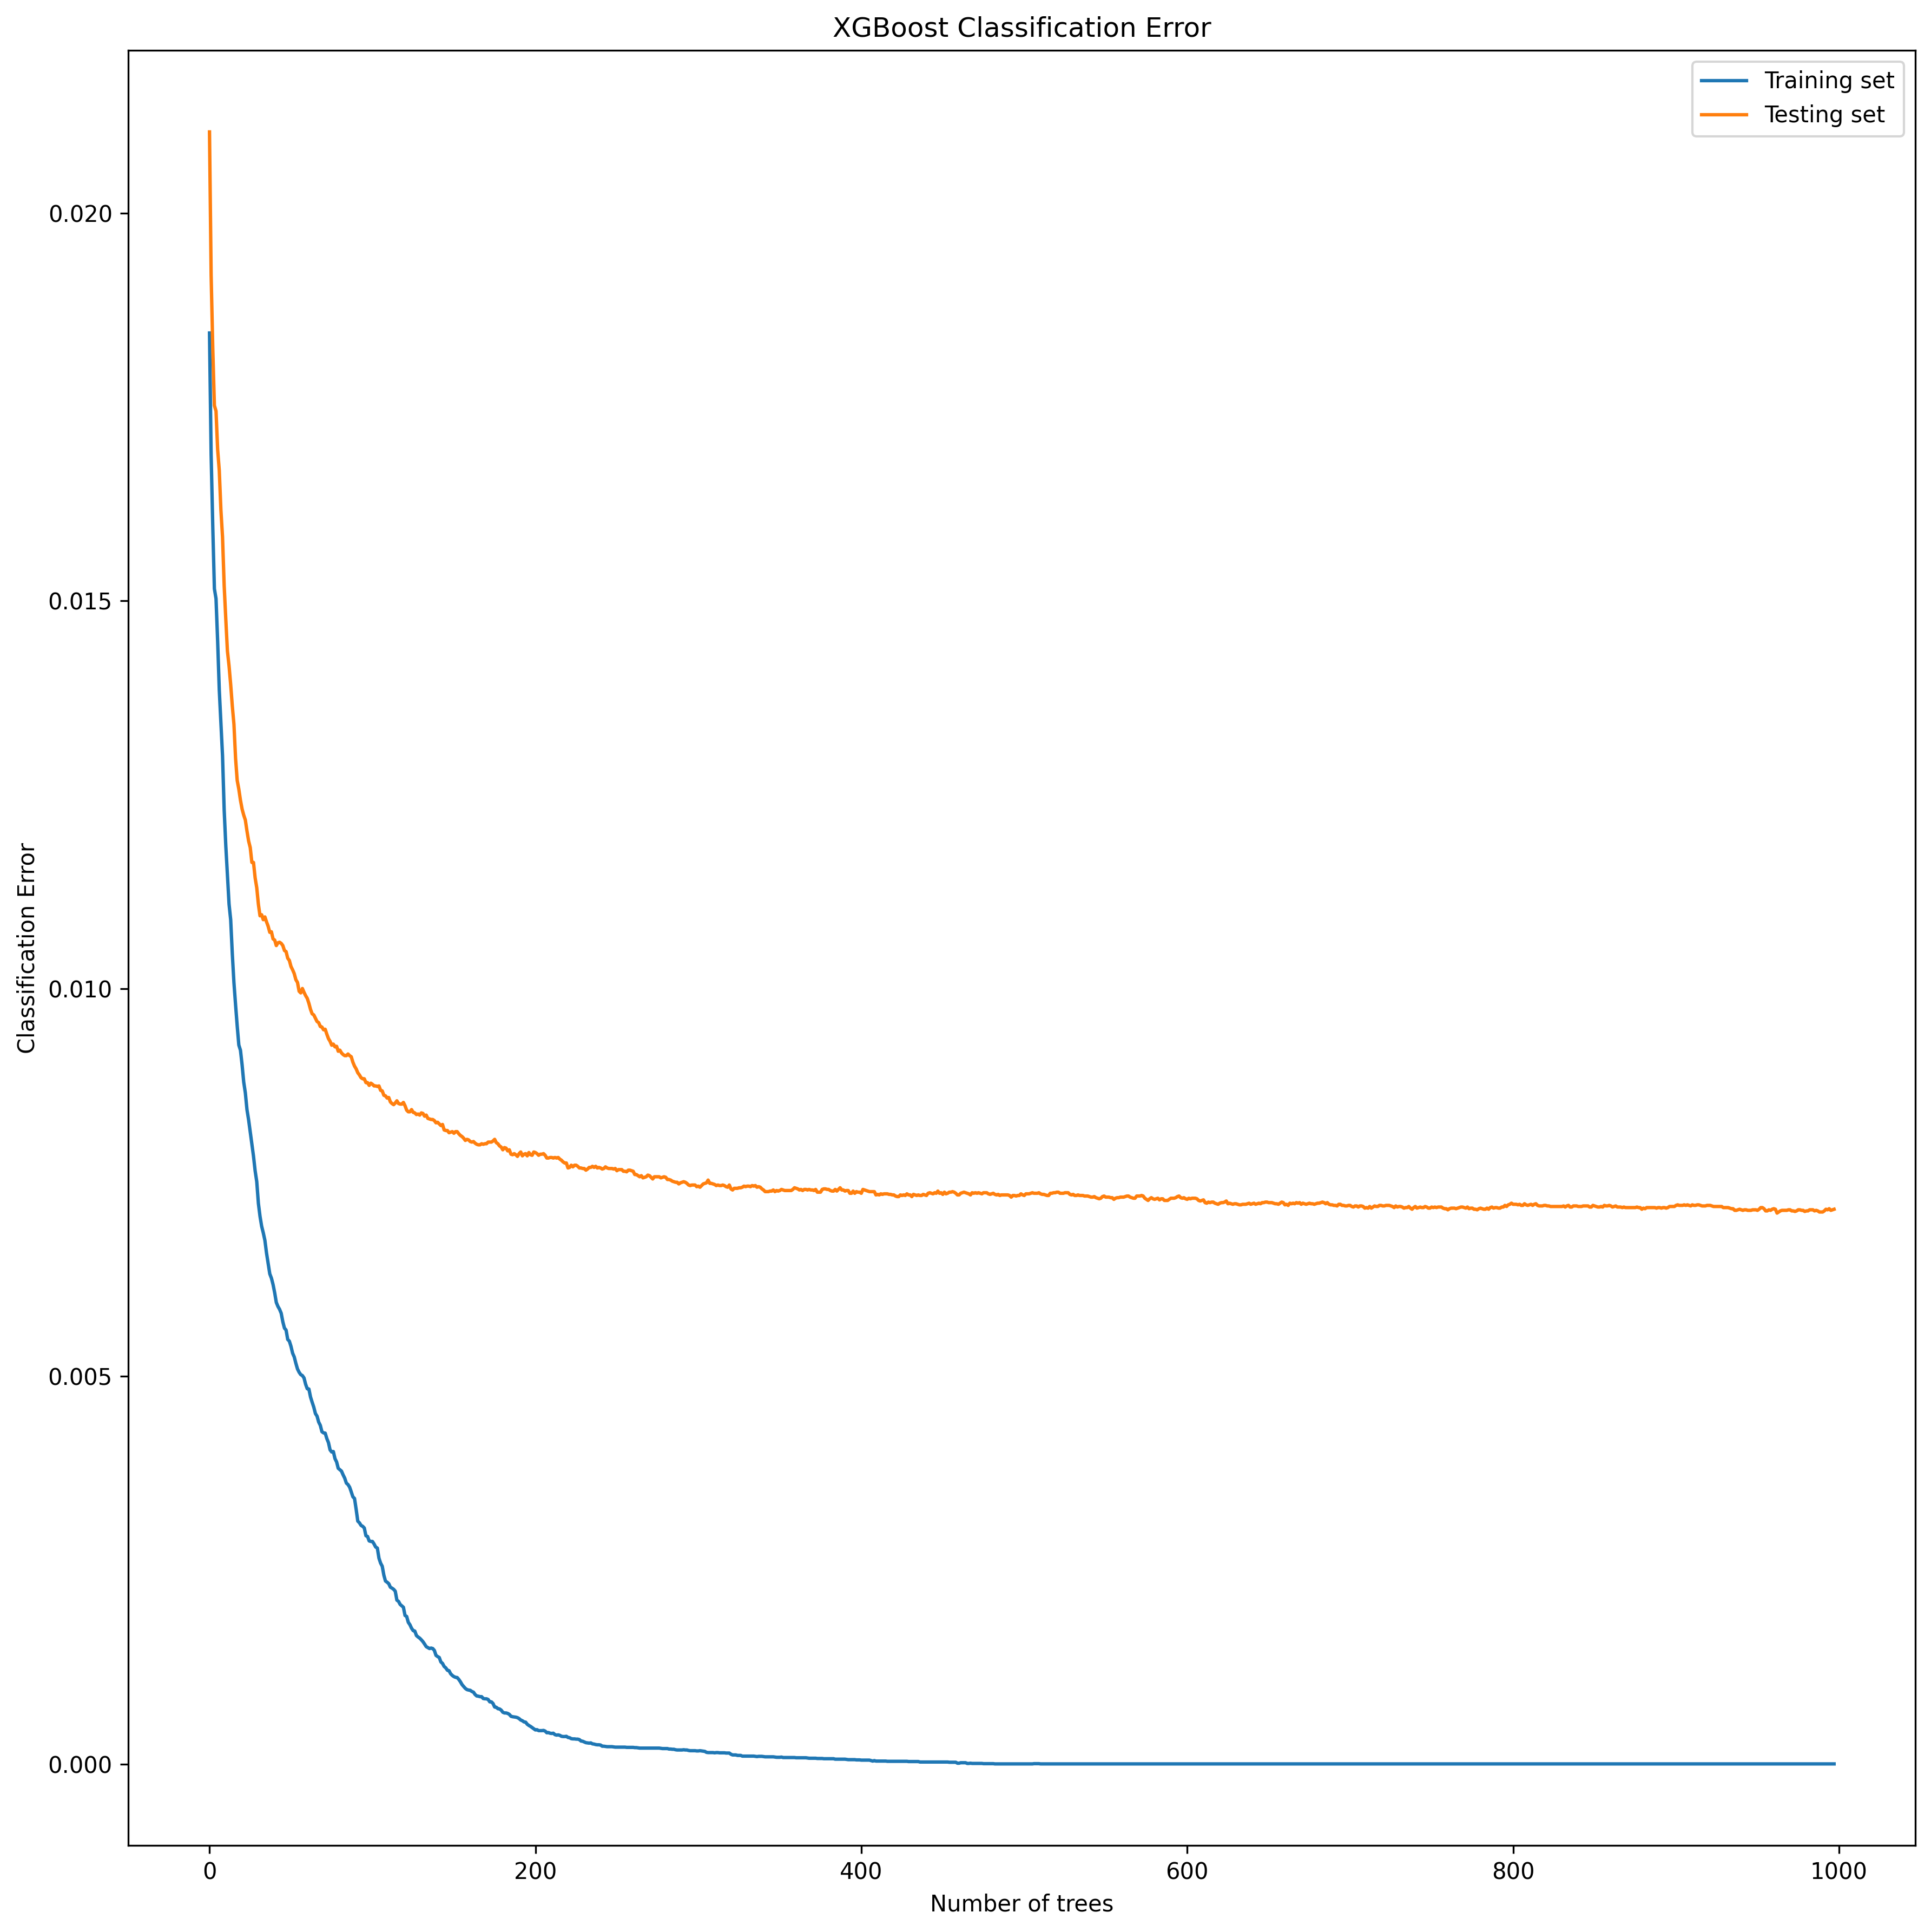

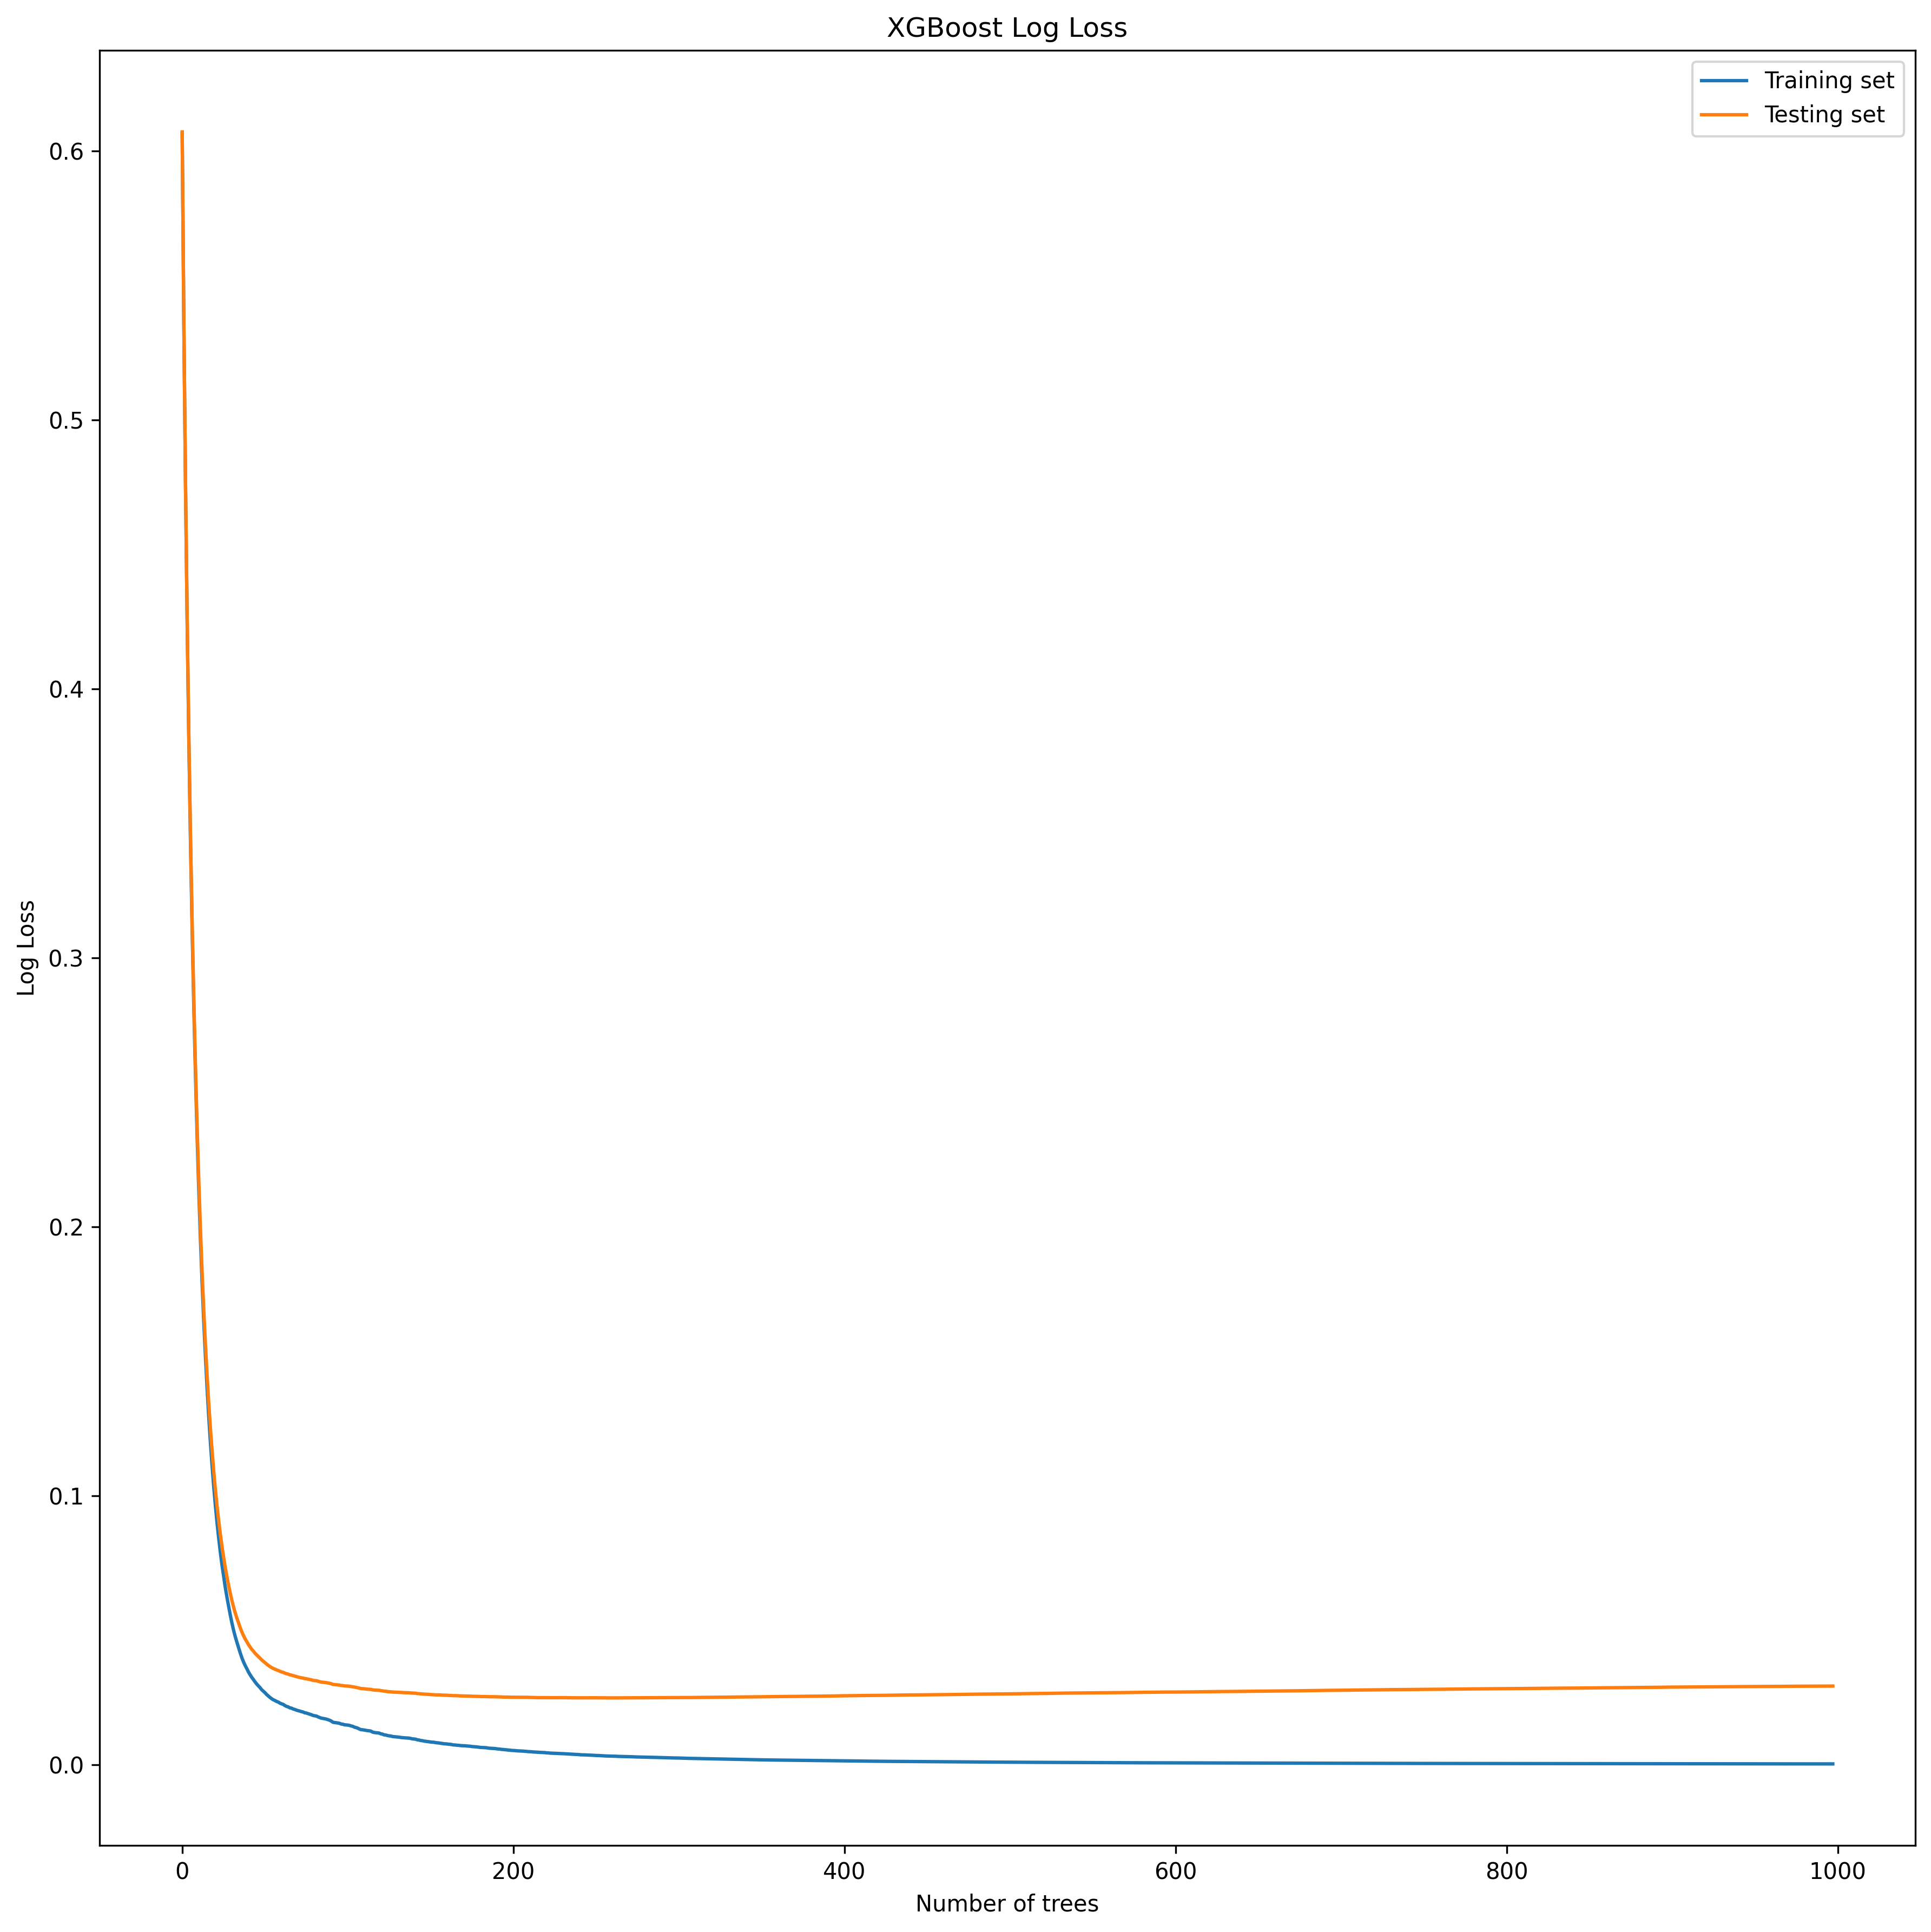

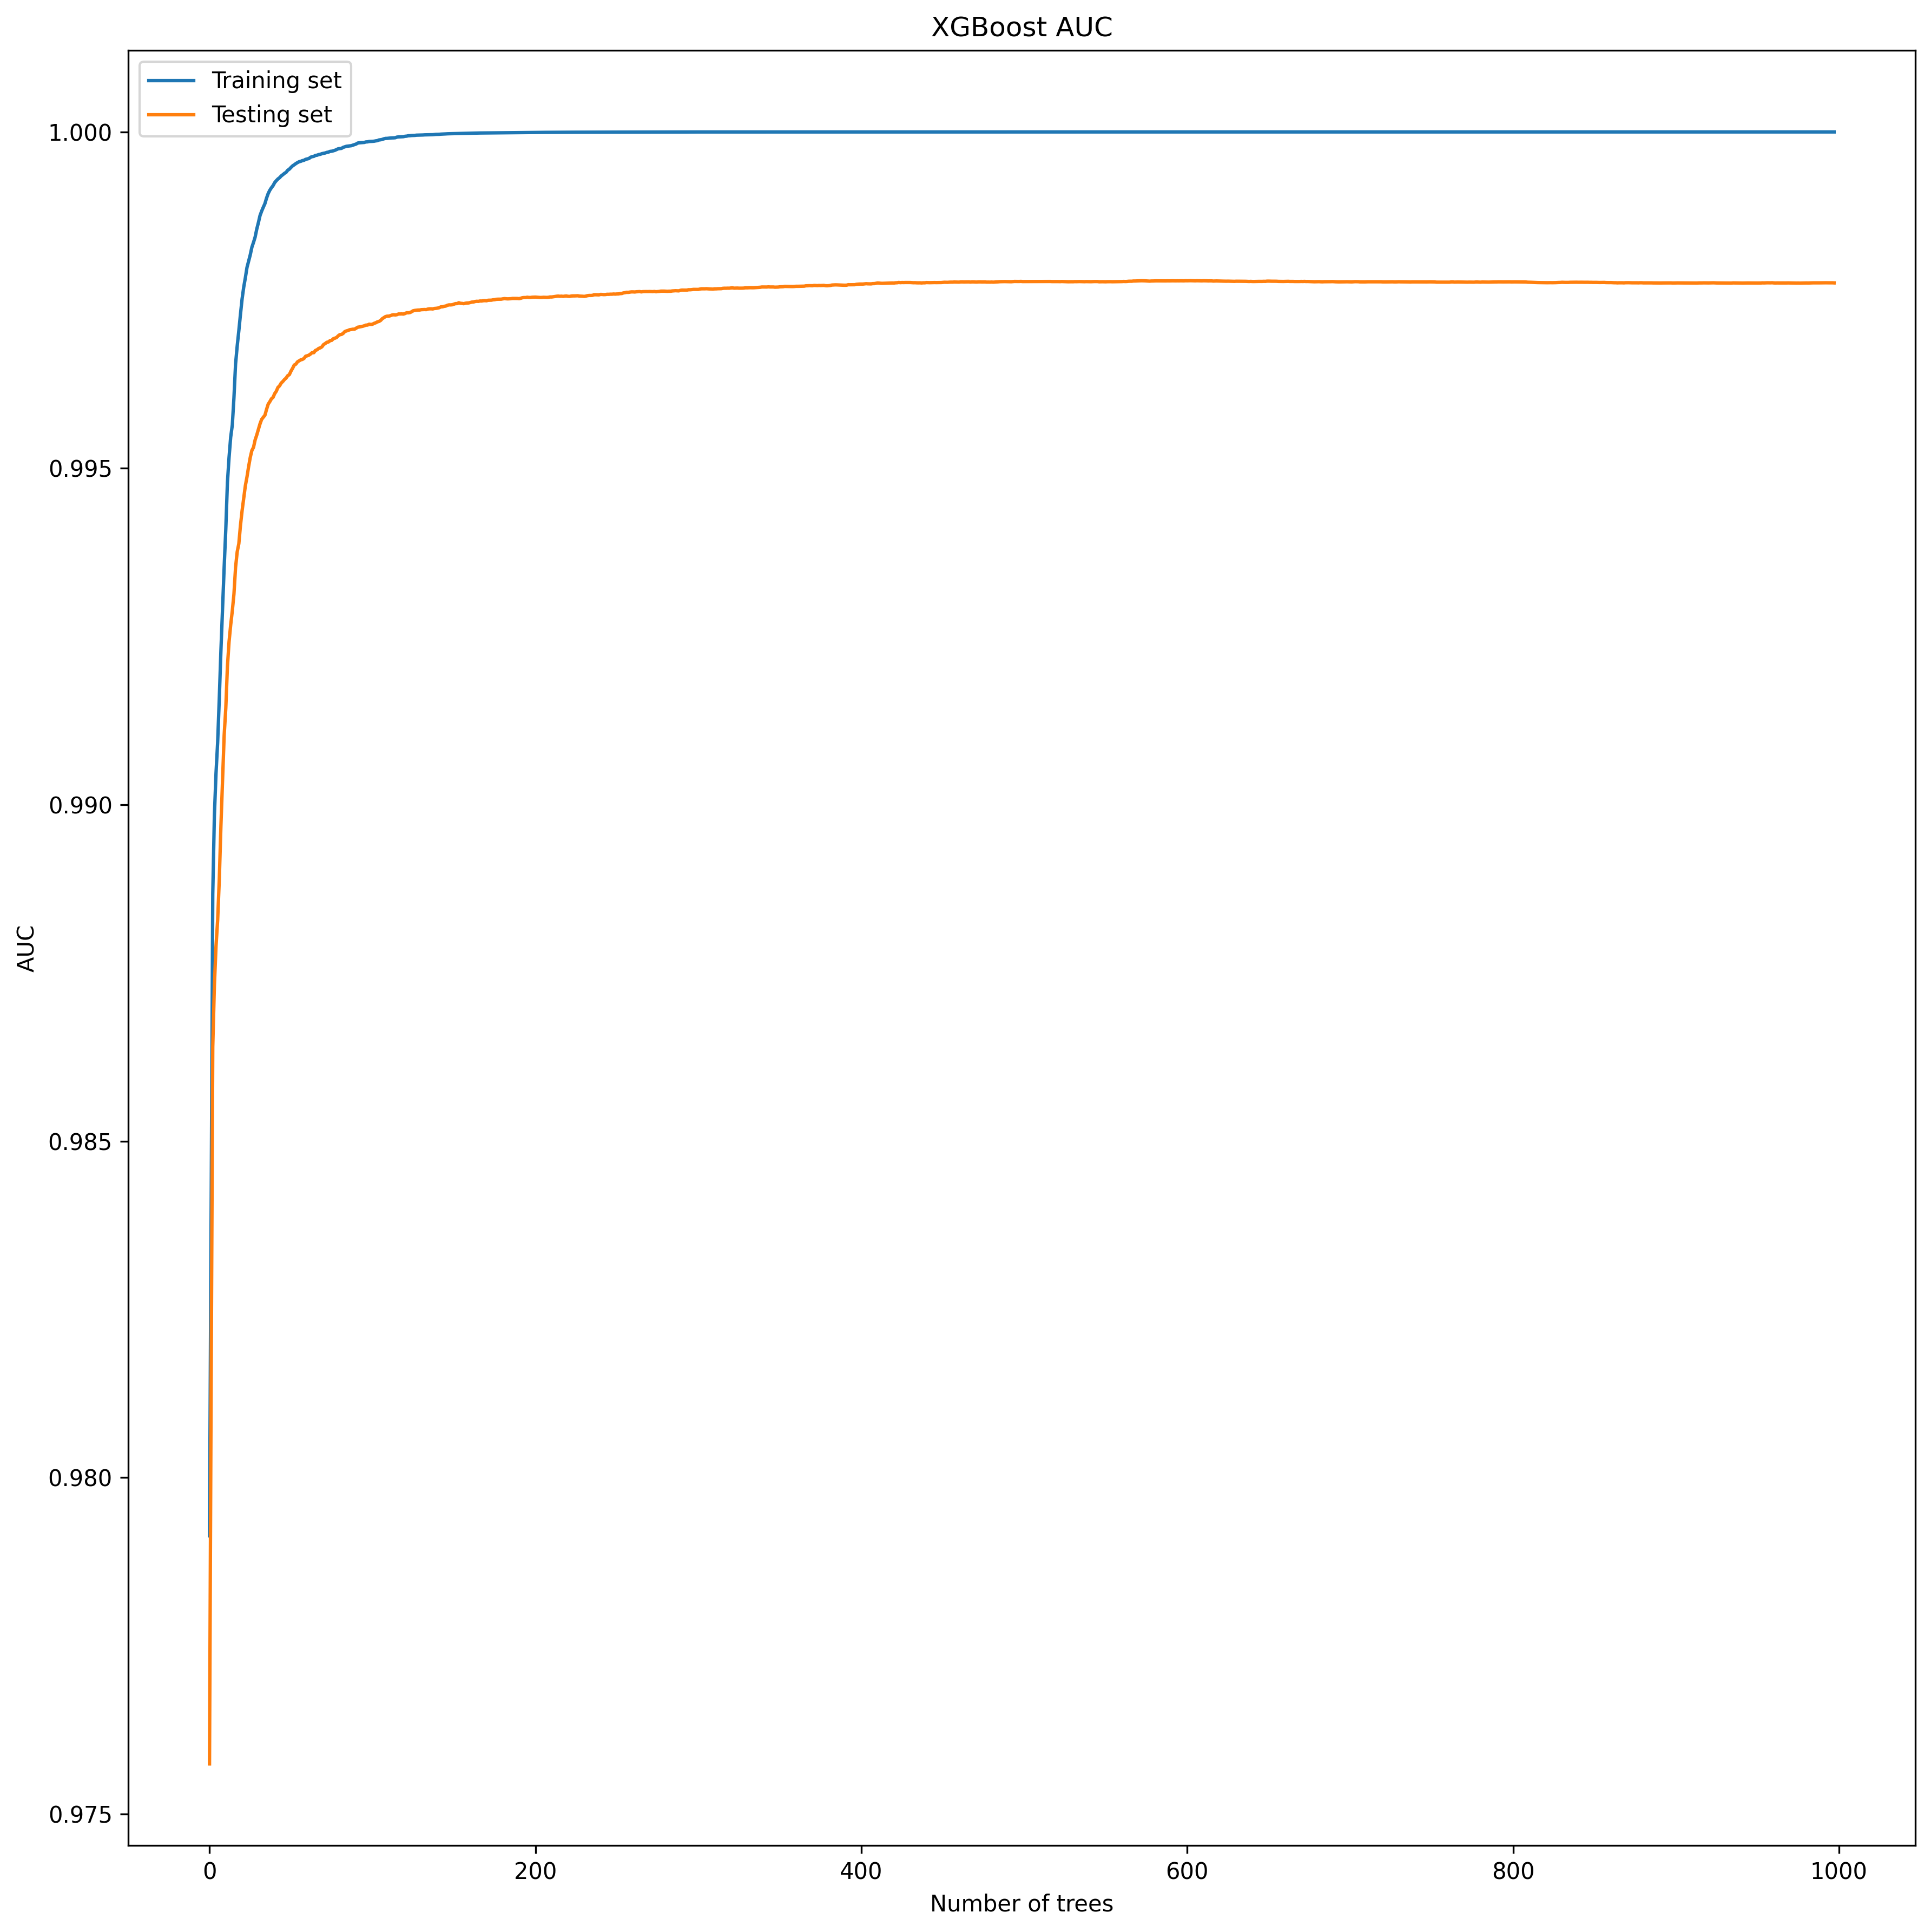

In [47]:
# plot evaluation
results = model.evals_result()
trees = len(results['validation_0']['error'])
x_axis = range(0, trees)

def plot_metric(metric):
    import matplotlib.pyplot as plt
    plt.rcParams["figure.dpi"] = 300
    #
    plt.plot(x_axis, results['validation_0'][metric], label='Training set')
    plt.plot(x_axis, results['validation_1'][metric], label='Testing set')
    plt.legend()
    mnames = {'error': 'Classification Error', 'logloss': 'Log Loss', 'auc': 'AUC'}
    mname = mnames[metric]
    plt.ylabel(mname)
    plt.xlabel('Number of trees')
    plt.title('XGBoost ' + mname)
    plt.show()

plot_metric('error')
plot_metric('logloss')
plot_metric('auc')

If you want to find the optimal set of hyperparameters (that is, the parameters for the model itself), you can use grid search. This will try all combinations of the parameters you specify and return the best one. This is a computationally expensive process, so it is recommended to run it on a machine with a GPU. The following cell shows a grid search, but is disabled by default. If you want to run it, set `run_grid_search` to `True`.

Fitting 3 folds for each of 17 candidates, totalling 51 fits
[CV 1/3] END scale_pos_weight=3.6;, score=(train=1.000, test=0.950) total time=  17.7s
[CV 2/3] END scale_pos_weight=3.6;, score=(train=1.000, test=0.950) total time=  17.4s
[CV 3/3] END scale_pos_weight=3.6;, score=(train=1.000, test=0.948) total time=  17.3s
[CV 1/3] END scale_pos_weight=3.7;, score=(train=1.000, test=0.950) total time=  17.6s
[CV 2/3] END scale_pos_weight=3.7;, score=(train=1.000, test=0.950) total time=  17.4s
[CV 3/3] END scale_pos_weight=3.7;, score=(train=1.000, test=0.948) total time=  17.3s
[CV 1/3] END scale_pos_weight=3.8;, score=(train=1.000, test=0.950) total time=  17.7s
[CV 2/3] END scale_pos_weight=3.8;, score=(train=1.000, test=0.950) total time=  17.5s
[CV 3/3] END scale_pos_weight=3.8;, score=(train=1.000, test=0.948) total time=  17.4s
[CV 1/3] END scale_pos_weight=3.9;, score=(train=1.000, test=0.950) total time=  17.7s
[CV 2/3] END scale_pos_weight=3.9;, score=(train=1.000, test=0.951) t

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       16.825163      0.146702         0.633175        0.001485   
1       16.808659      0.122266         0.638904        0.011530   
2       16.889624      0.145284         0.629181        0.004972   
3       16.884164      0.123129         0.628301        0.003443   
4       16.958610      0.167020         0.639941        0.017529   
5       17.017898      0.158318         0.636012        0.004068   
6       17.006712      0.110316         0.631778        0.000869   
7       16.987548      0.104413         0.637396        0.003384   
8       16.980404      0.135661         0.640417        0.010666   
9       17.190913      0.160574         0.631975        0.003478   
10      17.182726      0.145853         0.636172        0.003158   
11      17.432827      0.136125         0.643058        0.000733   
12      17.444214      0.149272         0.648262        0.005501   
13      17.448321      0.146094         0.644008

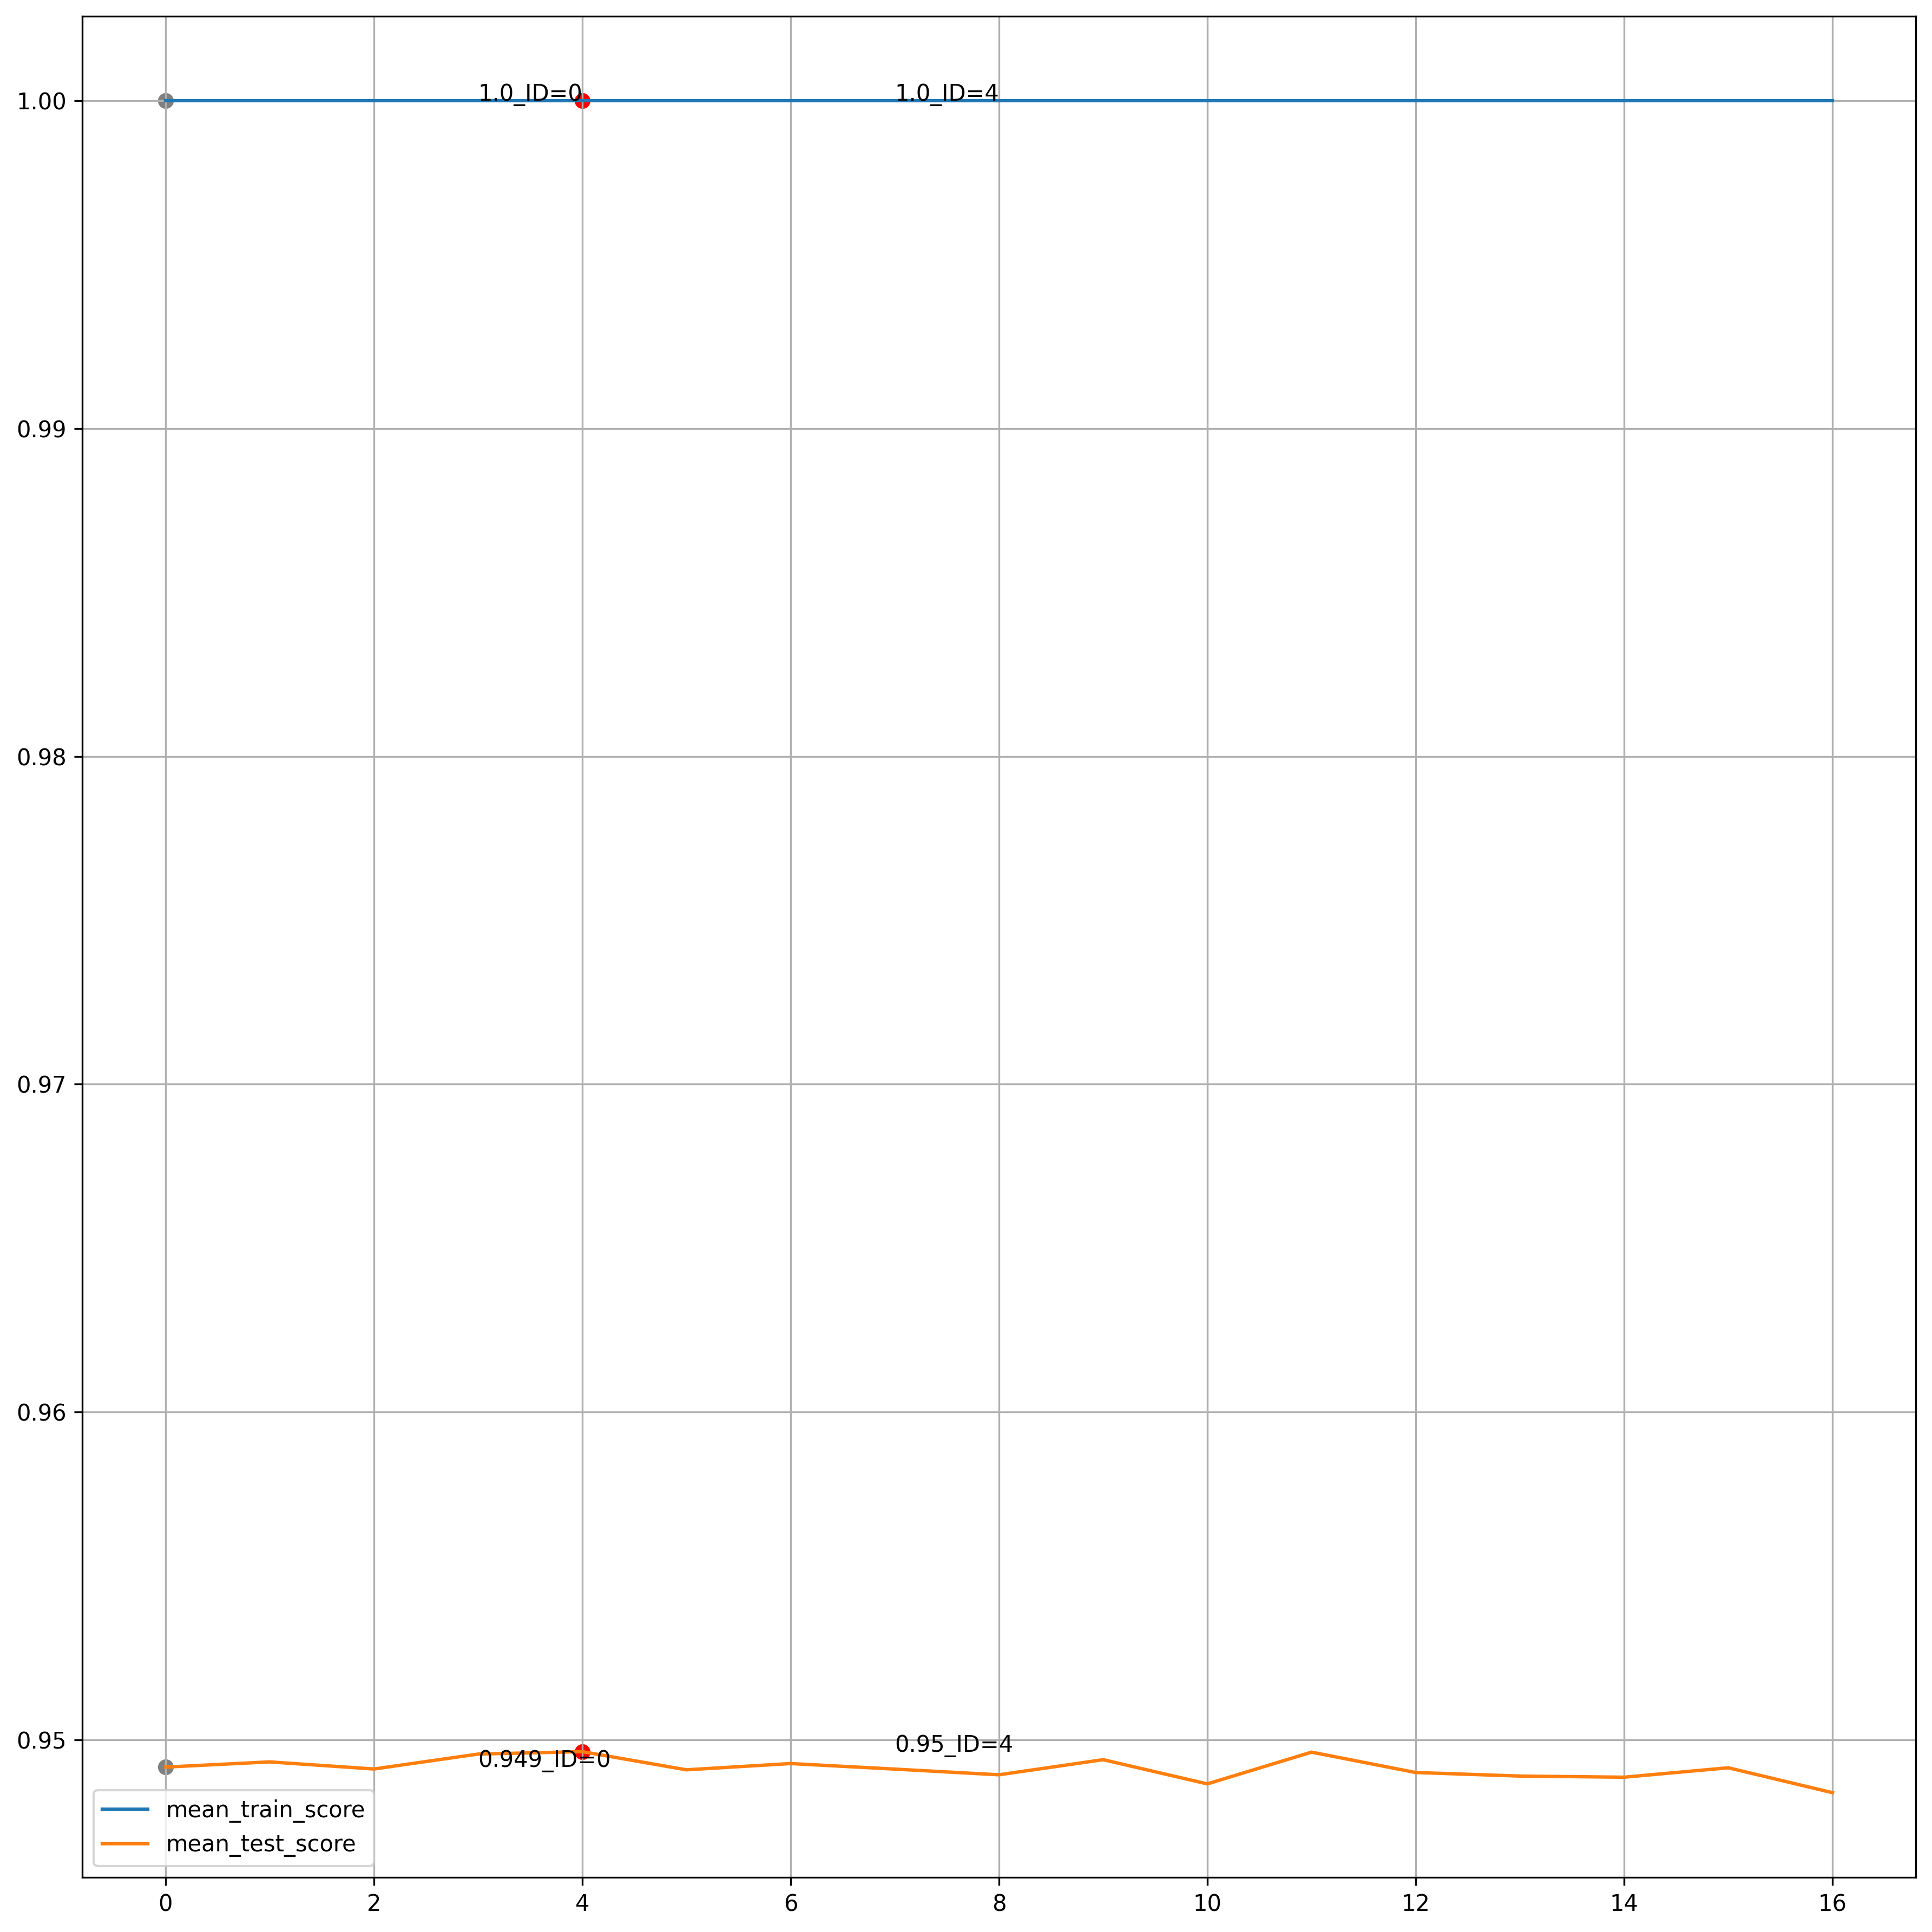

In [43]:
import warnings

# Filter warnings related to Pandas' 'is_sparse' deprecation
warnings.filterwarnings('ignore', message='.*is_sparse is deprecated.*')
warnings.filterwarnings('ignore', message='.*is_categorical_dtype is deprecated.*')



# Hyperparameter tuning
run_grid_search = True
if run_grid_search:
    import pandas as pd
    from sklearn.model_selection import train_test_split
    class_map = {"benign_2307:unknown": 0, "misp_2307:phishing": 1}
    labels = df['label'].apply(lambda x: class_map[x])
    features = df.drop('label', axis=1).copy()
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42, shuffle=True, stratify=labels)

    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import StratifiedKFold
    from xgboost import XGBClassifier

    params = {
        "objective": "binary:logistic",
        "tree_method": "gpu_hist",
        #"predictor": "gpu_predictor"
        "max_depth": 11, # <------------ CR CHANGE ***********
        "eta": 0.10,
        "min_child_weight": 1.1, # default: 1
        "sampling_method": "gradient_based",
        "subsample": 1.0, # default: 1
        "gamma": 0.0, # default: 0
        "grow_policy": "depthwise", # default: depthwise
        "max_bin": 2048,
        "n_estimators": 998, # <------------ CR CHANGE ***********
        "lambda": 1.0, # default: 1
        "alpha": 0.0   # default: 0
    }

    clf = XGBClassifier(**params)

    # this is your grid of parameters to search through, every combination will be tried
    
    grid = {
        "scale_pos_weight": [3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.5, 6, 6.5, 10.9, 11, 11.3, 11.5, 11.6, 12],
    }

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
    grid_search = GridSearchCV(
        estimator=clf,
        param_grid=grid,
        #n_jobs=-1,
        cv=cv,
        scoring='f1',#'f1', 'neg_log_loss'
        verbose=3,
        return_train_score=True
    )

    grid_search.fit(X_train, y_train)

    clf = grid_search.best_estimator_

    scores = pd.DataFrame(grid_search.cv_results_)
    col_names = ['mean_train_score', 'mean_test_score']

    scores = pd.DataFrame(grid_search.cv_results_)

    from numpy import array
    from numpy.ma import masked_array

    col_names = ['mean_train_score', 'mean_test_score']
    means_df = scores[col_names]
    ax = means_df.plot(kind='line', grid=True)


    from matplotlib import pyplot as plt
    plt.rcParams["figure.figsize"] = [12, 12]
    plt.rcParams["figure.autolayout"] = True

    plt.rcParams["figure.dpi"] = 300

    max_ids = means_df.idxmax(axis=0)

    for i in range(len(max_ids)):
        for col_name in col_names:
            value = means_df[col_name][max_ids[i]]
            id = max_ids[i]
            
            color = 'r' if max_ids[i] == max_ids['mean_test_score'] else 'grey'
            
            ax.scatter([id], [value],
                      marker='o',
                      color=color,
                      label='point',)

            ax.annotate(str(round(value, 3))+"_ID="+str(id),
                        (id, value),
                        xytext=(id+3, value))
            
    print(scores)
    
    
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    scores




In [45]:
scores


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scale_pos_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,16.825163,0.146702,0.633175,0.001485,3.6,{'scale_pos_weight': 3.6},0.949884,0.950124,0.947518,0.949176,0.001176,7,1.0,0.999971,1.0,0.99999,0.000014
1,16.808659,0.122266,0.638904,0.011530,3.7,{'scale_pos_weight': 3.7},0.950006,0.949518,0.948479,0.949334,0.000637,5,1.0,0.999971,1.0,0.99999,0.000014
2,16.889624,0.145284,0.629181,0.004972,3.8,{'scale_pos_weight': 3.8},0.949526,0.949622,0.948204,0.949117,0.000647,9,1.0,0.999971,1.0,0.99999,0.000014
3,16.884164,0.123129,0.628301,0.003443,3.9,{'scale_pos_weight': 3.9},0.949775,0.950719,0.948224,0.949572,0.001029,3,1.0,0.999971,1.0,0.99999,0.000014
4,16.958610,0.167020,0.639941,0.017529,4.0,{'scale_pos_weight': 4.0},0.949843,0.949802,0.949295,0.949647,0.000249,1,1.0,0.999971,1.0,0.99999,0.000014
5,17.017898,0.158318,0.636012,0.004068,4.1,{'scale_pos_weight': 4.1},0.949319,0.949704,0.948254,0.949093,0.000613,11,1.0,0.999971,1.0,0.99999,0.000014
6,17.006712,0.110316,0.631778,0.000869,4.2,{'scale_pos_weight': 4.2},0.949887,0.950065,0.947898,0.949284,0.000982,6,1.0,0.999971,1.0,0.99999,0.000014
7,16.987548,0.104413,0.637396,0.003384,4.3,{'scale_pos_weight': 4.3},0.949606,0.949994,0.947743,0.949114,0.000983,10,1.0,0.999971,1.0,0.99999,0.000014
8,16.980404,0.135661,0.640417,0.010666,4.5,{'scale_pos_weight': 4.5},0.949132,0.949491,0.948198,0.948941,0.000545,13,1.0,0.999971,1.0,0.99999,0.000014
9,17.190913,0.160574,0.631975,0.003478,6,{'scale_pos_weight': 6},0.949965,0.949489,0.948751,0.949402,0.000499,4,1.0,0.999971,1.0,0.99999,0.000014


In [8]:
import optuna
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold

run_optuna_study = False

if run_optuna_study:
    # Assuming df, class_map, labels, and features are defined as in the previous examples
    class_map = {"benign_2307:unknown": 0, "misp_2307:phishing": 1}
    labels = df['label'].apply(lambda x: class_map[x])
    features = df.drop('label', axis=1).copy()
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42, shuffle=True, stratify=labels)

    def objective(trial):
        """
        param = {
            'objective': 'binary:logistic',
            'tree_method': 'gpu_hist',  # Use 'hist' if not using GPU
            'lambda': trial.suggest_loguniform('lambda', 1e-8, 10.0),
            'alpha': trial.suggest_loguniform('alpha', 1e-8, 10.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1.0),
            'subsample': trial.suggest_float('subsample', 0.2, 1.0),
            'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2),
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 3, 9),
            #'min_child_weight': trial.suggest_int('min_child_weight', 2, 10)
            'min_child_weight': 1.1
        }
        """

        params = {
            "objective": "binary:logistic",
            "tree_method": "gpu_hist",
            "max_depth": trial.suggest_int('max_depth', 11, 14),
            #"max_depth": 12,
            "eta": 0.10,
            "min_child_weight": 1.1, # default: 1
            "sampling_method": "gradient_based",
            "subsample": 1.0, # default: 1
            "gamma": 0.0, # default: 0
            "grow_policy": "depthwise", # default: depthwise
            "max_bin": 2048,
            "n_estimators": 438, # <------------ CR CHANGE ***********
            #'n_estimators': trial.suggest_int('n_estimators', 300, 500),

            "lambda": 1.0, # default: 1
            "alpha": 0.0   # default: 0
        }


        # K-fold cross-validation setup
        kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        f1_scores = []

        for train_index, test_index in kf.split(features, labels):
            X_train, X_test = features.iloc[train_index], features.iloc[test_index]
            y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]

            clf = XGBClassifier(**params)
            clf.fit(X_train, y_train)

            preds = clf.predict(X_test)
            f1_scores.append(f1_score(y_test, preds))

        # Return the negative mean F1 score
        return np.mean(f1_scores)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=5)
    print(f"Best trial: {study.best_trial.value}")
    print(f"Best params: {study.best_trial.params}")

Either way, now you should have a trained model ready to use. Let's save it first, so we can use it later.

In [33]:
import pickle
pickle.dump(model, open("xgboost_model.pickle.dat", "wb"))

# Step 3: Evaluating the model's performance
(You can run the next cell only and then skip to the next step if you just want to play with SHAP)

We can now load the model at any time and use it to make predictions. We can also evaluate its performance on the test set. The following cell will load the model and evaluate it on the test set. It will also print the confusion matrix and classification report.

In [48]:
import pickle
model = pickle.load(open("xgboost_model.pickle.dat", "rb"))

0.9539929361038484
              precision    recall  f1-score   support

           0     0.9946    0.9977    0.9961    129772
           1     0.9716    0.9370    0.9540     11098

    accuracy                         0.9929    140870
   macro avg     0.9831    0.9673    0.9751    140870
weighted avg     0.9928    0.9929    0.9928    140870

0.9539929361038484
TN: 129468 <-- True Negatives
FP: 304 <-- False Positives
FN: 699 <-- False Negatives
TP: 10399 <-- True Positives
FPR:0.002342570045926702 <-- False Positive Rate
TPR:0.9370156785006307 <-- True Positive Rate (same as Recall)


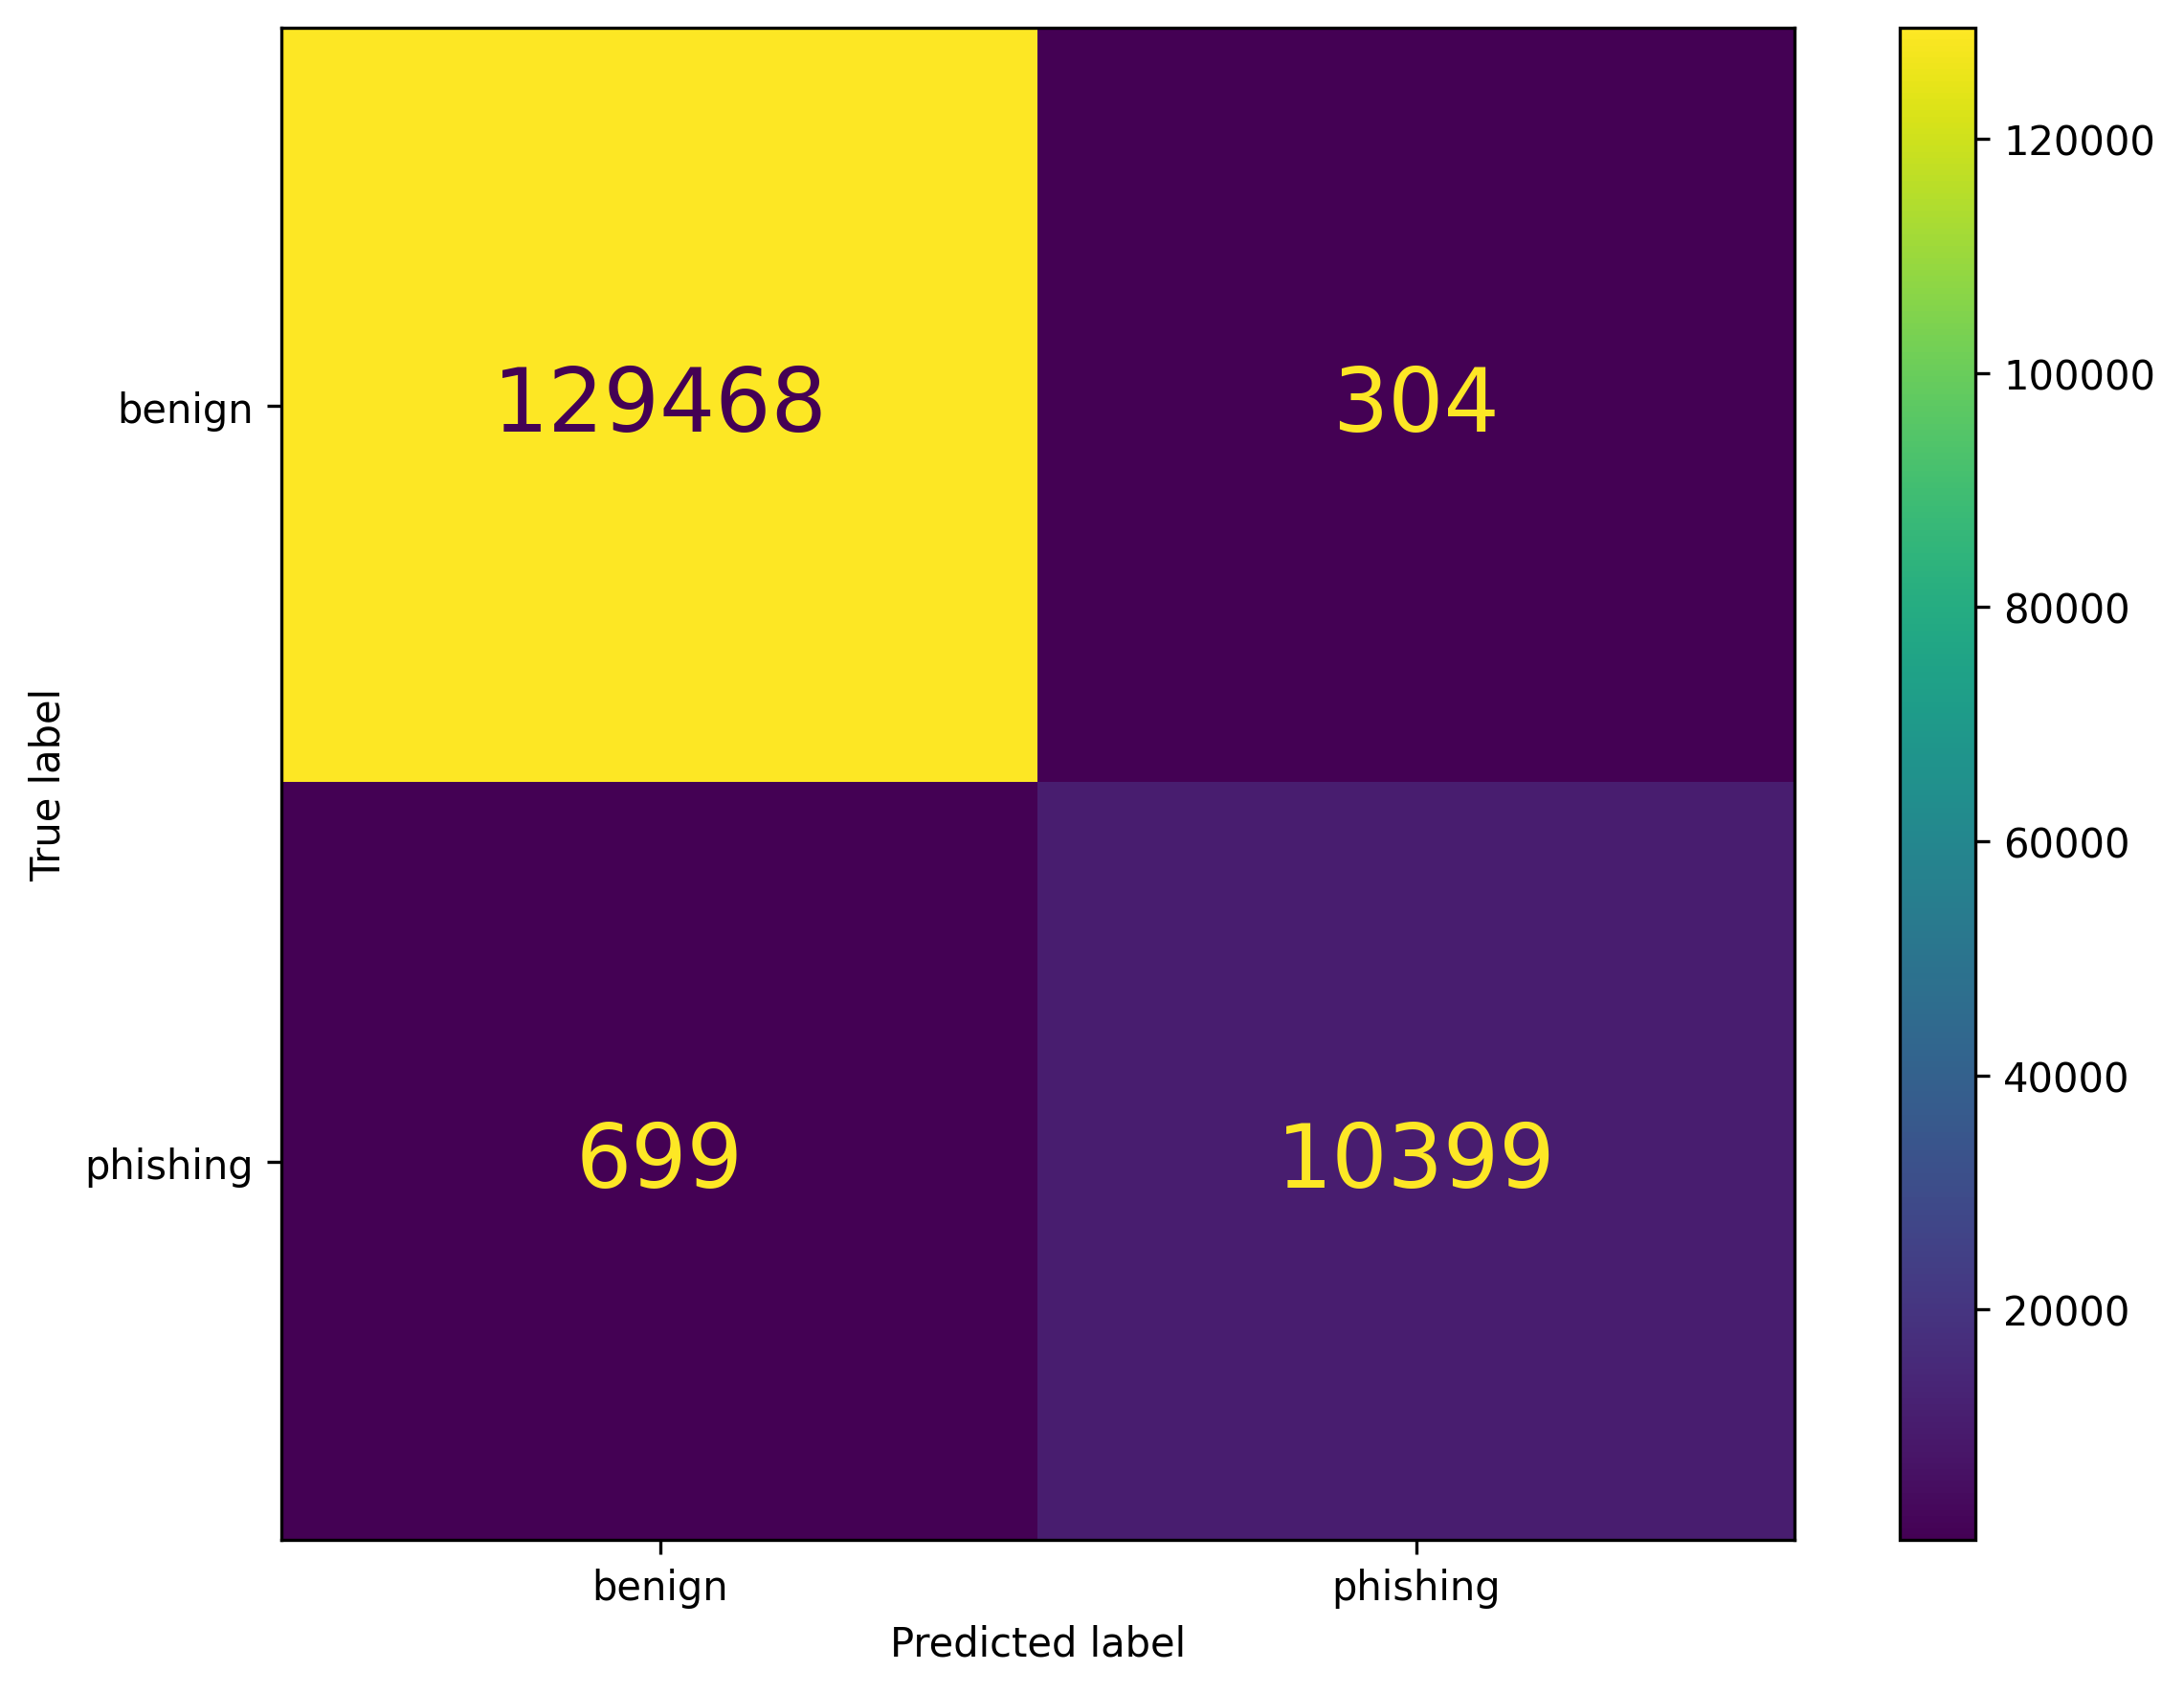

In [49]:
predicted = model.predict(X_test)

from sklearn.metrics import f1_score, confusion_matrix
print(f1_score(y_test, predicted))

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 300
    
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, det_curve
print(classification_report(y_test, predicted, digits=4))

f1 = f1_score(y_test, predicted)
print(f1)

conf_matrix = confusion_matrix(y_test, predicted)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR)
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)

print("TN: " + str(tn) + " <-- True Negatives")
print("FP: " + str(fp) + " <-- False Positives")
print("FN: " + str(fn) + " <-- False Negatives")
print("TP: " + str(tp) + " <-- True Positives")

print("FPR:" + str(fpr) + " <-- False Positive Rate")
print("TPR:" + str(tpr) + " <-- True Positive Rate (same as Recall)")


ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, text_kw={'fontsize': 22}, display_labels=['benign', 'phishing'], values_format='d')
plt.savefig("cfm_noms.pdf")


# Step 4: Explaining the model's predictions
(You can start from the cell where the pickled shap values are loaded if you already have them)

We can now use SHAP to gain insight into the model's predictions. First, shap values need to be computed for the test set. This is a computationally expensive process, but in practice, you can significantly reduce the time needed by using a narrower sample of the data, without affecting the results much. The following cell will compute shap values for the test set. It will also save the shap values to a file, so you can load them later without having to recompute them.

In [50]:
# initialize shap
import shap
# get shap values (use a smaller sample of the test set if you want to save coffee)
explainer = shap.TreeExplainer(model)
X_sample = X_test
shap_values = explainer.shap_values(X_sample)
# save the values for later use
import pickle
pickle.dump(shap_values, open("shap_values.pickle.dat", "wb"))

The shap values are now stored. You can later start all the way here (after running the mandatory cells in previous steps) to only play with SHAP.

In [51]:
# load the values to start from here
import pickle
shap_values = pickle.load(open("shap_values.pickle.dat", "rb"))

In [52]:
import shap
shap.initjs()
reverse_class_map = {v: k for k, v in class_map.items()}

## Force plot
The force plot shows the shap values for a single prediction. The values are sorted by their absolute value, so the most important features are the largest arrows. The color indicates the influence of the feature. The red color indicates a positive value, while the blue color indicates a negative value. The base value is the average prediction for the whole dataset. The output value is the prediction for the selected sample. The sum of the base value and the shap values is equal to the output value. You can see how each feature "forces" the shap value to its final resting position, determining the resulting prediction.

Note that the force plot is interactive, but that breaks with widgets. So instead just change the sample variable to see different samples and rerun the cell.

In [53]:
sample = 0

print("Predicted: %s" % reverse_class_map[model.predict(X_test.iloc[sample,:].values.reshape(1, -1))[0]])
print("Actual: %s" % reverse_class_map[y_test.iloc[sample]])
shap.force_plot(explainer.expected_value, shap_values[sample,:], X_test.iloc[sample,:])

Predicted: benign_2307:unknown
Actual: benign_2307:unknown


# Summary plot
The summary plot shows (in dot or violin mode) how individual feature values are distributed for each feature. The x-axis shows the shap value, while the color shows the feature value. The features are sorted by their importance, so the most important features are at the top. The color indicates the value of the feature. The red color indicates a high value, while the blue color indicates a low value. The zero line is the split point between outputs, just like the base value in the force plot. For some features, you might see that low values usually result in negative classification, while high values usually result in positive classification.

Another mode, bar, shows a mean shap value across all data points, which is effectively a plot of feature importance. Use the widgets to switch between modes and feature count. Also note that the violin and dot plots take a while to calculate, so you might want to start with a low feature count.

In [54]:
import ipywidgets as widgets
from ipywidgets import interact
plot_type = widgets.RadioButtons(
    options=['dot', 'layered_violin', 'bar'],
    value='layered_violin',
    description='Plot Type:',
    disabled=False
)
max_display = widgets.IntSlider(
    value=10,
    description='Max Display:',
    disabled=False,
    min=1,
    max=len(X_sample.columns)-1
)

@interact
def plot_shap(plot_type=plot_type, max_display=max_display):
        shap.summary_plot(shap_values, X_sample, show=False, plot_type=plot_type, class_names=class_map.values(), max_display=max_display, plot_size=[10, max_display])
        plt.savefig("shap_summary_noms.pdf")

interactive(children=(RadioButtons(description='Plot Type:', index=1, options=('dot', 'layered_violin', 'bar')…

In [55]:
# get gain score
score = model.get_booster().get_score(importance_type='gain')
sorted_score = sorted(score.items(), key=lambda x: x[1], reverse=True)
sorted_score

for s in sorted_score:
    print(s)

('ip_v4_count', 371.30072021484375)
('rdap_domain_age', 100.14702606201172)
('tls_CA_certs_in_chain_ratio', 81.92082977294922)
('dns_zone_entropy', 65.80758666992188)
('dns_NS_count', 61.85163116455078)
('dns_soa_retry', 58.7783317565918)
('dns_domain_name_in_mx', 54.64447021484375)
('lex_phishing_tetragram_matches', 44.48786163330078)
('tls_total_extension_count', 43.04511642456055)
('tls_critical_extensions', 38.08036422729492)
('lex_phishing_pentagram_matches', 28.154518127441406)
('tls_broken_chain', 24.419269561767578)
('dns_TXT_count', 23.370014190673828)
('lex_www_flag', 22.208242416381836)
('tls_expired_chain', 20.31473159790039)
('tls_common_name_count', 18.230371475219727)
('lex_sub_count', 16.463777542114258)
('lex_begins_with_digit', 15.398270606994629)
('lex_sub_digit_ratio', 15.057245254516602)
('lex_tld_len', 14.998505592346191)
('tls_subject_count', 14.616077423095703)
('ip_count', 14.240640640258789)
('dns_AAAA_count', 14.02991771697998)
('rdap_domain_active_time', 13.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import shap

# Assuming 'model' and 'X_test' are already defined and 'model' is trained
# Assuming 'positive_class_shap_values' should be the SHAP values for the positive class in a binary classification

# Check if shap_values is a list (multi-class) or a single array (binary classification)
if isinstance(shap_values, list):
    # Multi-class scenario: Extract SHAP values for the positive class
    positive_class_shap_values = shap_values[1]  # Assuming index 1 corresponds to the positive class
else:
    # Binary classification scenario: Use shap_values directly
    positive_class_shap_values = shap_values





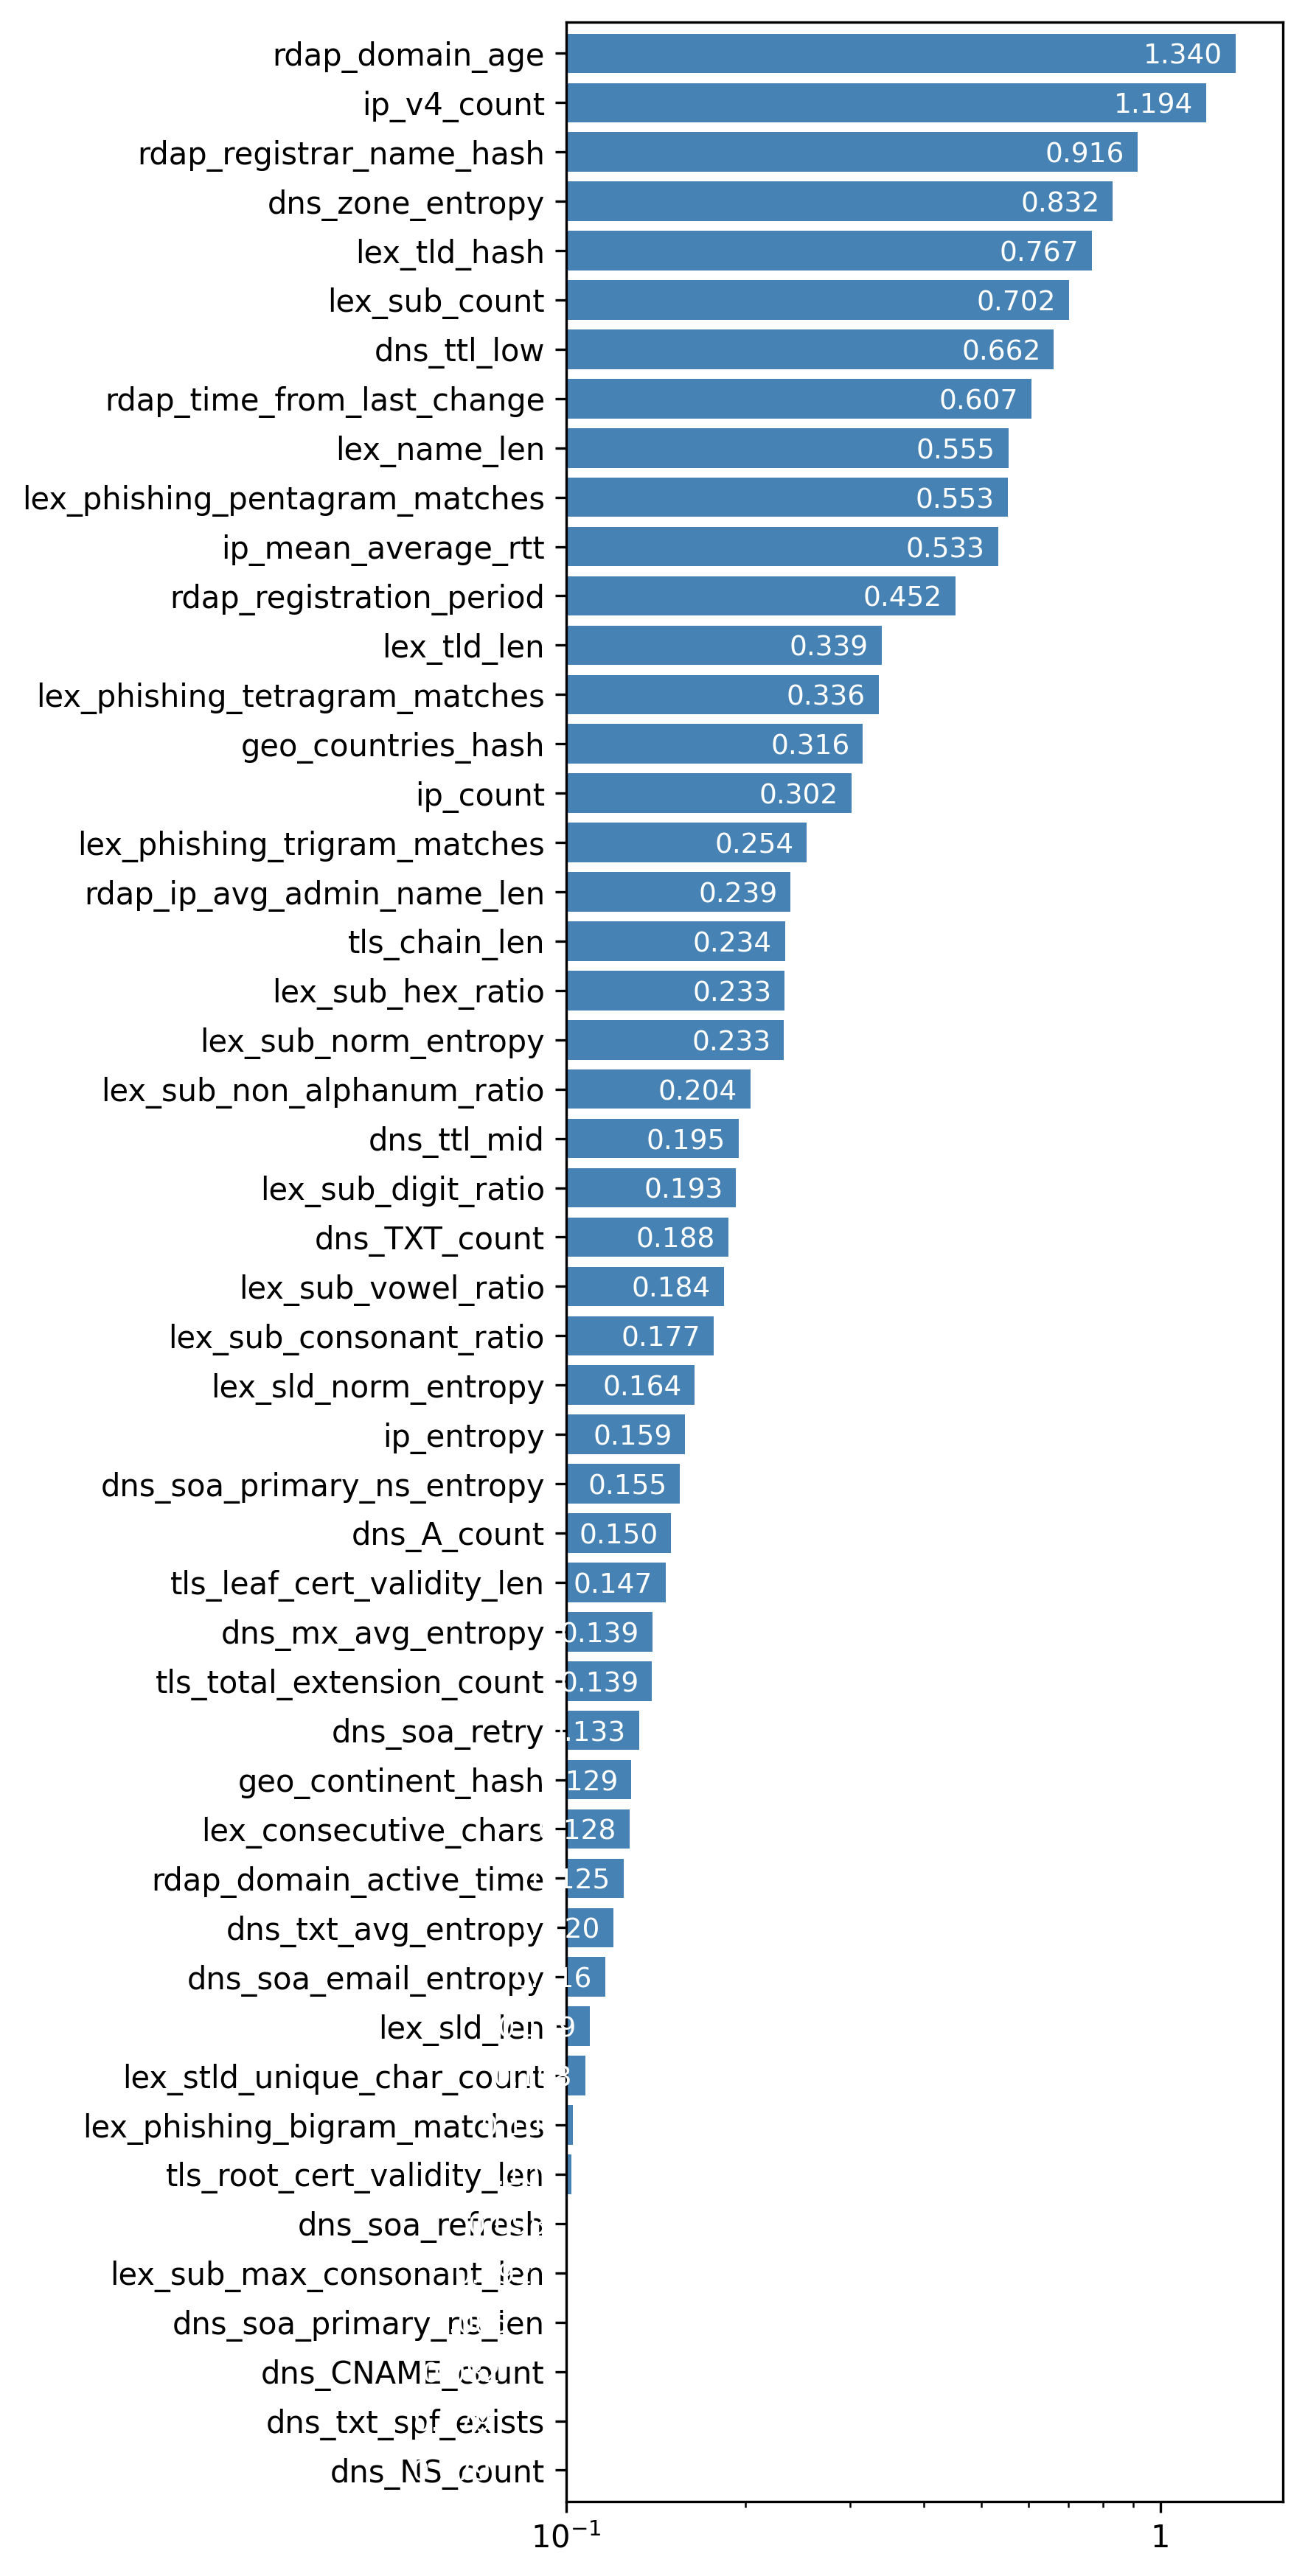

In [57]:
import numpy as np
import matplotlib.pyplot as plt

max_display=50
X_sample = X_test
shap_values = positive_class_shap_values


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)  # This should directly give the SHAP values array for binary classification

# Proceed with calculating mean absolute SHAP values
mean_shap_values = np.mean(np.abs(shap_values), axis=0)  # This should now work as expected
sorted_indices = np.argsort(mean_shap_values)
top_indices = sorted_indices[-max_display:]

# Custom bar height and spacing
bar_height = 0.12
spacing = 0.15
y_positions = np.arange(max_display) * spacing

colors = 'steelblue'

plt.figure(figsize=(6, 11.75))

# Plotting the bars
bars = plt.barh(y_positions, mean_shap_values[top_indices], height=bar_height, align='center', color=colors)

# Add textual values on each bar
for bar in bars:
    xval = bar.get_width()
    label_text = f'{xval:.3f}'
    
    plt.text(xval - (0.05 * xval), bar.get_y() + bar.get_height()/2 - 0.01, label_text, 
             ha='right', va='center', color='white', fontsize=9)

plt.yticks(y_positions, X_sample.columns[top_indices])
plt.ylim(y_positions[0] - 0.095, y_positions[-1] + 0.095)
plt.xscale('log')
locs, labels = plt.xticks()
new_labels = [str(int(loc)) if loc == 1 or loc == 0.1 else label.get_text() for loc, label in zip(locs, labels)]
plt.xticks(locs, new_labels)
max_shap_value = np.max(mean_shap_values[top_indices])
plt.xlim(0.1, max_shap_value*1.2)

plt.tight_layout()
plt.savefig("shap_summary_bar noms.pdf")
plt.show()
